In [72]:
from sklearn.cluster import KMeans 
import pandas as pd 
import numpy as no
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [73]:
df=pd.read_csv('../Downloads/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


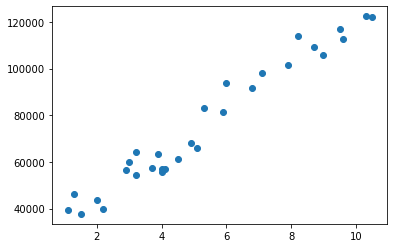

In [74]:
# plotting againt scatterplot 
plt.scatter(df['YearsExperience'], df['Salary'])

In [75]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [76]:
# fit and predict at the same time 
y_predicted=km.fit_predict(df[['YearsExperience', 'Salary']])
y_predicted 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2])

In [77]:
df['clusters_alloted']=y_predicted

In [78]:
df

,YearsExperience,Salary,clusters_alloted
0,1.1,39343.0,1
1,1.3,46205.0,1
2,1.5,37731.0,1
3,2.0,43525.0,1
4,2.2,39891.0,1
5,2.9,56642.0,1
6,3.0,60150.0,1
7,3.2,54445.0,1
8,3.2,64445.0,1
9,3.7,57189.0,1


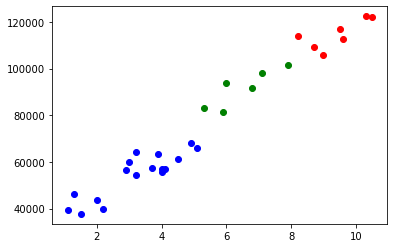

In [79]:
df1=df[df.clusters_alloted==0] # returning rows where clusters=0
df2=df[df.clusters_alloted==1]
df3=df[df.clusters_alloted==2]
plt.scatter(df1.YearsExperience, df1['Salary'], color='green' )
plt.scatter(df2.YearsExperience, df2['Salary'], color='blue' )
plt.scatter(df3.YearsExperience, df3['Salary'], color='red' )



In [80]:
# sometimes clusters are not grouped by correctly
#due to scaling differrence for eg. data is long enough bbut not wide 
# so we have to use min max scaler 
scaler=MinMaxScaler()
# You should reshape your X to be a 2D array not 1D array.
#Fitting a model requires requires a 2D array. i.e (n_samples, n_features)
scaler.fit((df['Salary'].to_numpy()).reshape(-1,1))
df['Salary']=scaler.transform((df['Salary'].to_numpy()).reshape(-1,1))
df

,YearsExperience,Salary,clusters_alloted
0,1.1,0.019041,1
1,1.3,0.100094,1
2,1.5,0.000000,1
3,2.0,0.068438,1
4,2.2,0.025514,1
5,2.9,0.223376,1
6,3.0,0.264812,1
7,3.2,0.197425,1
8,3.2,0.315545,1
9,3.7,0.229837,1


In [81]:
#normalizing from 0 to 1 to YearsExperience
scaler.fit((df.YearsExperience.to_numpy()).reshape(-1,1))
df.YearsExperience=scaler.transform((df.YearsExperience.to_numpy()).reshape(-1,1))

# for converting in 2D array 
(df['Salary'].to_numpy()).reshape(-1,1)

In [82]:
# fitting my scaled data 

km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['YearsExperience', 'Salary']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
df['clusters']=y_predicted
df.drop('clusters_alloted', axis='columns', inplace=True)
df

,YearsExperience,Salary,clusters
0,0.000000,0.019041,1
1,0.021277,0.100094,1
2,0.042553,0.000000,1
3,0.095745,0.068438,1
4,0.117021,0.025514,1
5,0.191489,0.223376,1
6,0.202128,0.264812,1
7,0.223404,0.197425,1
8,0.223404,0.315545,1
9,0.276596,0.229837,1


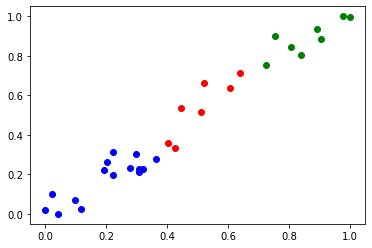

In [84]:
# again plotting in scatterplot 
df1=df[df.clusters==0] # returning rows where clusters=0
df2=df[df.clusters==1]
df3=df[df.clusters==2]
plt.scatter(df1.YearsExperience, df1['Salary'], color='green' )
plt.scatter(df2.YearsExperience, df2['Salary'], color='blue' )
plt.scatter(df3.YearsExperience, df3['Salary'], color='red' )


In [87]:
# to get the centroids 
km.cluster_centers_

array([[0.86303191, 0.88906508],
       [0.19929078, 0.17935428],
       [0.50759878, 0.53702541]])

In [90]:
k_values= range(1,10)
sse=[] # sum of squared error for diff. values of k
for k in k_values:
    km=KMeans(n_clusters=k)
    y_predicted=km.fit(df[['YearsExperience', 'Salary']])
    sse.append(km.inertia_)
sse
    

C:\Users\msi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.684101493731801,
 1.1964172294563449,
 0.6595353283667087,
 0.2856507223864635,
 0.2014210382499788,
 0.14621099079652466,
 0.10586296297154273,
 0.09222778564797716,
 0.07009171844141447]

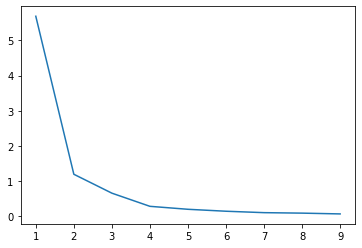

In [91]:
plt.plot(k_values,sse)